In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv


In [3]:
#Dua Amjad Sipra
#2021142
#LAb Final

# importing important libraries
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
import string
import warnings
# for showing all the plots inline
%matplotlib inline
# importing NLP libraries

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from textblob import TextBlob

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#1--Loading the dataset
df= pd.read_csv("/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv")

# Perform data cleaning and handle missing values if necessary

#2--Split the dataset into a training set and a testing set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

#3--Define the feature set and target variable
X_train = train_df['Text'].fillna('')
y_train = train_df['Language']
X_test = test_df['Text'].fillna('')
y_test = test_df['Language']

#4--Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree:
Accuracy: 0.8673132686731326
Precision: 0.8583333534225569
Recall: 0.8673132686731326
F1-score: 0.8566357041071866



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest:
Accuracy: 0.9199080091990801
Precision: 0.9160950884452235
Recall: 0.9199080091990801
F1-score: 0.9096718784214127



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN:
Accuracy: 0.88001199880012
Precision: 0.8916002084677117
Recall: 0.88001199880012
F1-score: 0.8630585270877509



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multinomial Naive Bayes:
Accuracy: 0.8189181081891811
Precision: 0.7915891419645169
Recall: 0.8189181081891811
F1-score: 0.7684830272496646

Silhouette Score: 0.01162636402363998


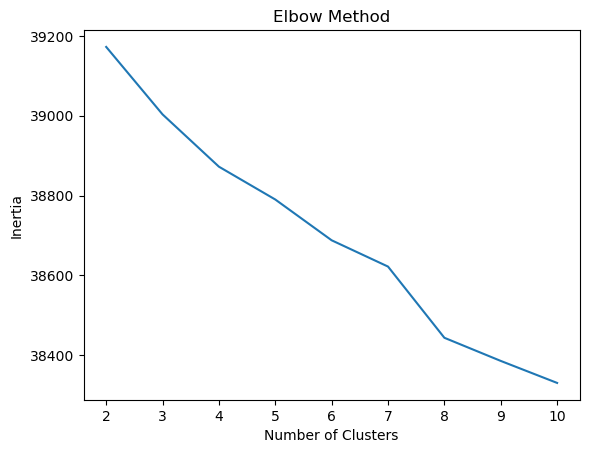

In [7]:
#5--Train and evaluate supervised machine learning models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Multinomial Naive Bayes': MultinomialNB()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')
    print()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train)

# Evaluate the performance of clustering algorithm
cluster_labels = kmeans.predict(X_test)
silhouette_avg = silhouette_score(X_test, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Use the Elbow Method to determine the optimal number of clusters
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Silhouette Score: 0.01560503132581434


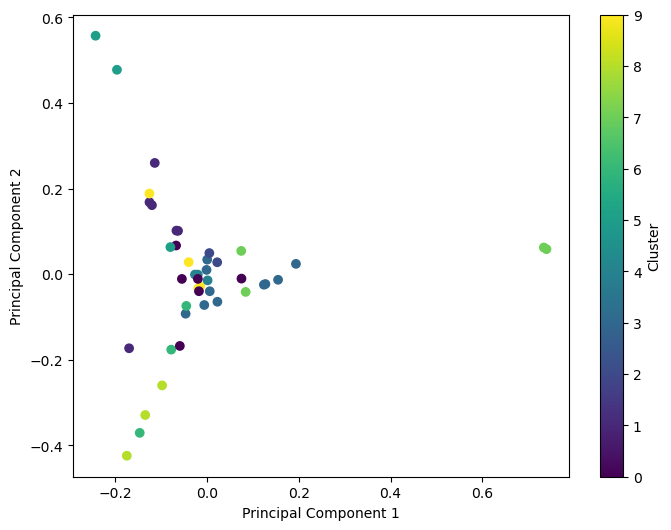

In [15]:
#3--Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Convert the text data into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['Text'])

# Determine the appropriate number of clusters using silhouette score
max_clusters = 10
best_silhouette_score = -1
best_num_clusters = 0

for num_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_tfidf)
    silhouette_avg = silhouette_score(X_tfidf, labels)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_num_clusters = num_clusters

# Perform K-means clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_tfidf)

# Evaluate the performance using silhouette score
silhouette_avg = silhouette_score(X_tfidf, labels)
print("Silhouette Score:", silhouette_avg)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

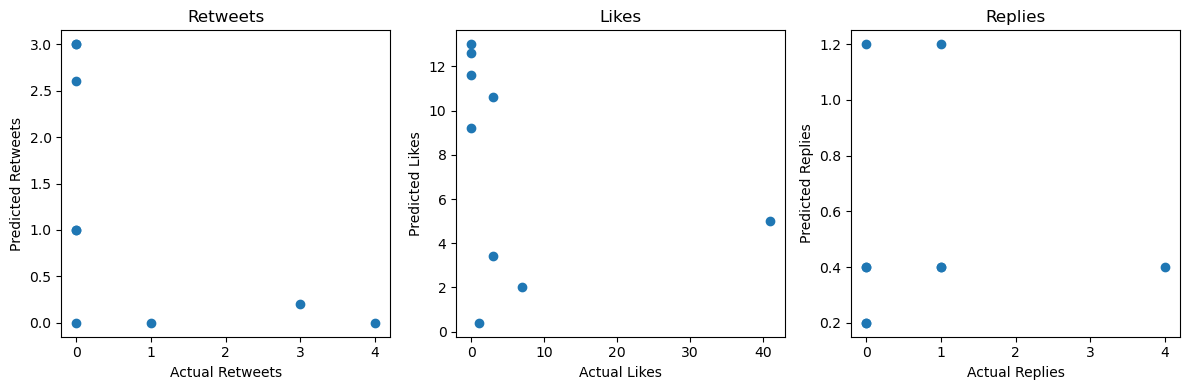

In [10]:
#4--Engagement Prediction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Define the feature set and target variables

# Features: text content of the tweets
X = df['Text']  

# Target variable: number of retweets
y_retweets = df['RetweetCount'] 

# Target variable: number of likes
y_likes = df['LikeCount'] 

# Target variable: number of replies
y_replies = df['ReplyCount']

# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train_retweets, y_test_retweets = train_test_split(X_tfidf, y_retweets, test_size=0.2, random_state=42)
_, _, y_train_likes, y_test_likes = train_test_split(X_tfidf, y_likes, test_size=0.2, random_state=42)
_, _, y_train_replies, y_test_replies = train_test_split(X_tfidf, y_replies, test_size=0.2, random_state=42)

# Train the KNN model for retweets
knn_retweets = KNeighborsRegressor(n_neighbors=5)
knn_retweets.fit(X_train, y_train_retweets)

# Predict on the testing set for retweets
y_pred_retweets = knn_retweets.predict(X_test)

# Train the KNN model for likes
knn_likes = KNeighborsRegressor(n_neighbors=5)
knn_likes.fit(X_train, y_train_likes)

# Predict on the testing set for likes
y_pred_likes = knn_likes.predict(X_test)

# Train the KNN model for replies
knn_replies = KNeighborsRegressor(n_neighbors=5)
knn_replies.fit(X_train, y_train_replies)

# Predict on the testing set for replies
y_pred_replies = knn_replies.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(12, 4))

# Plot for retweets
plt.subplot(131)
plt.scatter(y_test_retweets, y_pred_retweets)
plt.xlabel('Actual Retweets')
plt.ylabel('Predicted Retweets')
plt.title('Retweets')

# Plot for likes
plt.subplot(132)
plt.scatter(y_test_likes, y_pred_likes)
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Likes')

# Plot for replies
plt.subplot(133)
plt.scatter(y_test_replies, y_pred_replies)
plt.xlabel('Actual Replies')
plt.ylabel('Predicted Replies')
plt.title('Replies')

plt.tight_layout()
plt.show()



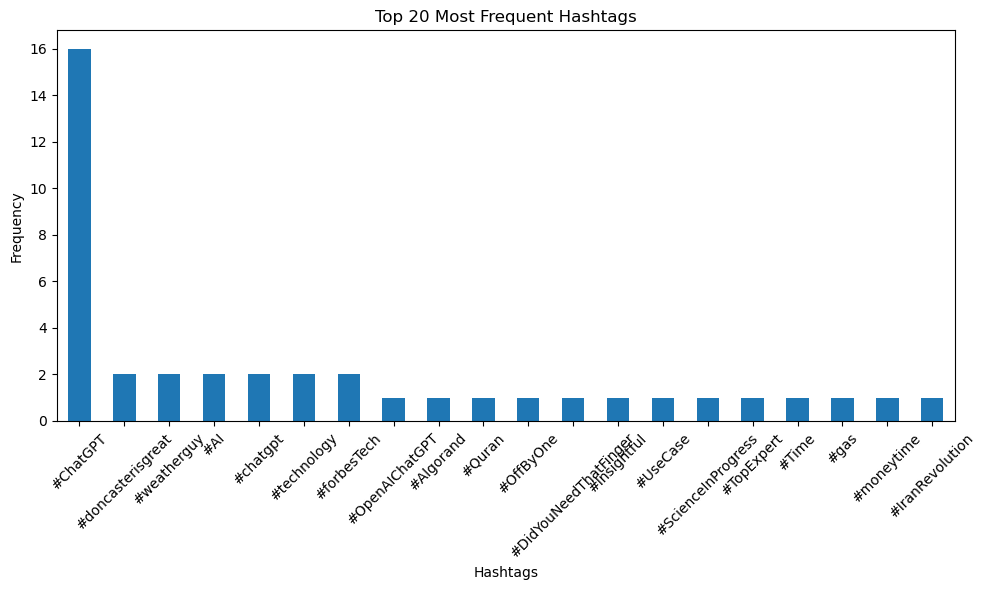

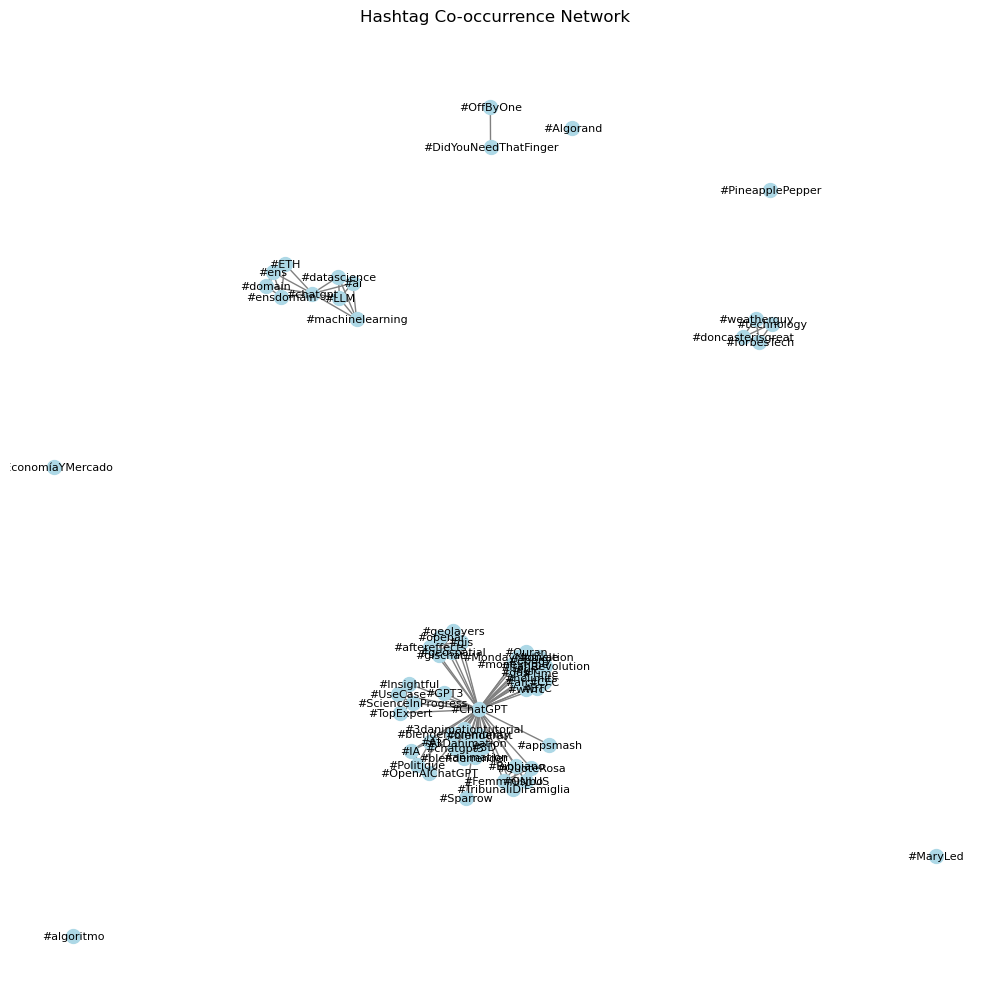

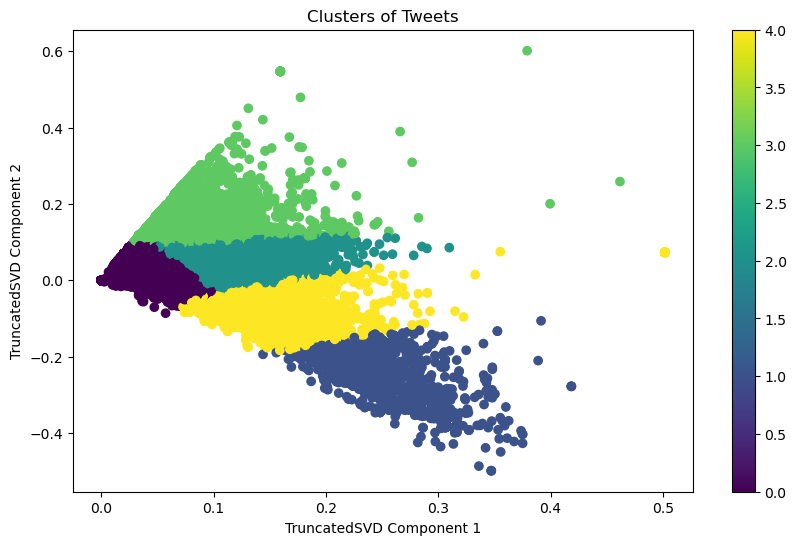

In [5]:
#5--Hashtag Analysis
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Remove duplicates


df= pd.read_csv("/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv")

# Perform data cleaning and handle missing values if necessary

# Split the dataset into a training set and a testing set
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
X = df['Text']  # Features: text content of the tweets

# Define the feature set and target variable
X_train = train_df['Text'].fillna('')
y_train = train_df['Language']
X_test = test_df['Text'].fillna('')
y_test = test_df['Language']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X)
# Extract hashtags from tweet text
df['Hashtags'] = df['Text'].str.findall(r'#\w+')

# Count the frequency of each hashtag
hashtags_list = df['Hashtags'].sum()
hashtags_count = pd.Series(hashtags_list).value_counts()

# Plot frequency of hashtags
plt.figure(figsize=(10, 6))
hashtags_count.head(20).plot(kind='bar')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Hashtags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify common themes or topics
cooccurrence_matrix = pd.DataFrame(0, index=hashtags_count.index, columns=hashtags_count.index)
for hashtags in df['Hashtags']:
    for h1 in hashtags:
        for h2 in hashtags:
            if h1 != h2:
                cooccurrence_matrix.loc[h1, h2] += 1

# Plot co-occurrence matrix as a network graph
G = nx.from_pandas_adjacency(cooccurrence_matrix)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx(G, pos, node_color='lightblue', node_size=100, edge_color='gray', font_size=8)
plt.title('Hashtag Co-occurrence Network')
plt.axis('off')
plt.tight_layout()
plt.show()

#import numpy as np
from sklearn.decomposition import TruncatedSVD

# Apply TruncatedSVD to reduce the dimensionality of the data
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

# Apply K-means clustering
num_clusters = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X_svd)

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title('Clusters of Tweets')
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

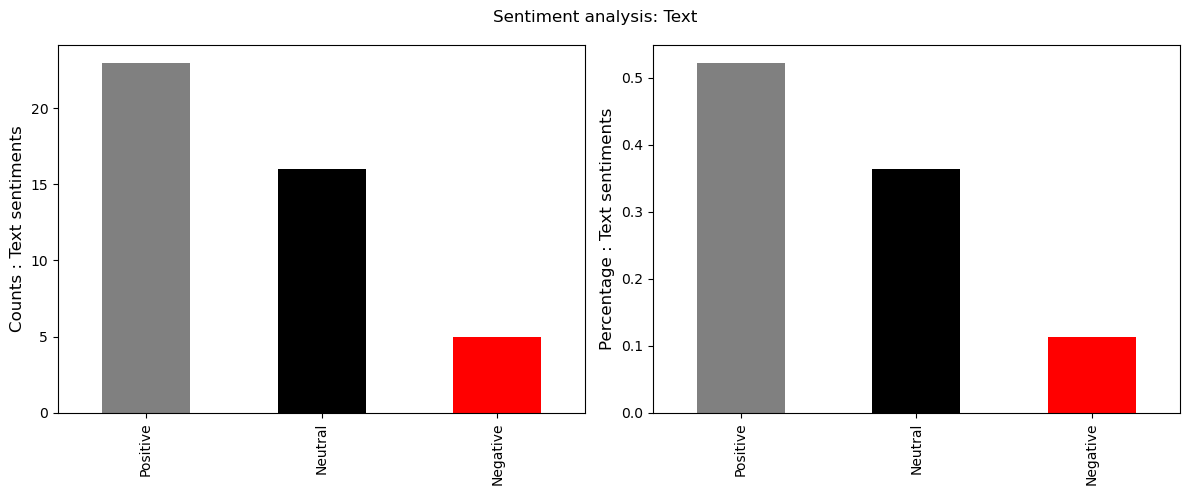

In [26]:
#1--Sentimental Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

    
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["grey", "black", "red"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

df['text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

In [28]:
from sklearn.preprocessing import LabelEncoder
# Handle missing data (optional)
df = df.dropna()  # Remove rows with missing values

# Split the dataset into features and target variable
X = df[['Text', 'Language']]
y = df['Username']

# Label encode the 'Text' and 'Language' columns
label_encoder = LabelEncoder()
X['Text'] = label_encoder.fit_transform(X['Text'])
X['Language'] = label_encoder.fit_transform(X['Language'])

# Encoding categorical variables (if any)
# Perform one-hot encoding or label encoding on categorical columns in X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


Accuracy: 0.1111111111111111


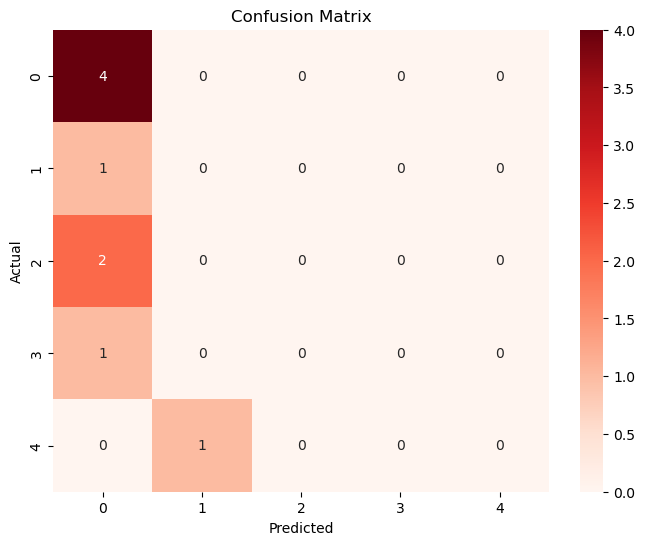

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1

    accuracy                           0.44         9
   macro avg       0.10      0.20      0.13         9
weighted avg       0.22      0.44      0.30         9



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
#Extra
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['LikeCount'], test_size=0.2, random_state=42)

# Vectorize the text data using the TF-IDF technique
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test_tfidf)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


In [ ]:
most_occured_values(df)

In [ ]:
# plotting distribution for various Numerical columns

**Plotting distribution for various numerical columns**

In [ ]:
df["ReplyCount"].value_counts()

In [ ]:
df["ReplyCount"].unique()

In [ ]:
sns.countplot(data=df, x='ReplyCount', order=df["ReplyCount"].value_counts().index[:5])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["RetweetCount"].value_counts()

In [ ]:
df["RetweetCount"].unique()

In [ ]:
sns.countplot(data=df, x='RetweetCount', order=df["RetweetCount"].value_counts().index[:5])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["LikeCount"].value_counts()

In [ ]:
df["LikeCount"].unique()

In [ ]:
sns.countplot(data=df, x='LikeCount', order=df["LikeCount"].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["QuoteCount"].unique()

In [ ]:
df["QuoteCount"].value_counts()

In [ ]:
sns.countplot(data=df, x='QuoteCount', order=df["QuoteCount"].value_counts().index[:5])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["Language"].unique()

In [ ]:
df["Language"].value_counts()

In [ ]:
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df["hashtag"].unique()

In [ ]:
df["hashtag"].value_counts()

In [ ]:
sns.countplot(data=df, x='hashtag', order=df["hashtag"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["hastag_counts"].unique()

In [ ]:
df["hastag_counts"].value_counts()

In [ ]:
sns.countplot(data=df, x='hastag_counts', order=df["hastag_counts"].value_counts().index[:5])
plt.xticks(rotation=45)
plt.show()

****Showing wordcloud for all the tweets****

In [ ]:
# Text Preprocessing

In [ ]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
df['tidy_text'] = np.vectorize(remove_pattern)(df['Text'], "@[\w]*: | *RT*")
df[["Text", "tidy_text"]].head(5)

In [ ]:
df_tweets= df[["tidy_text"]]
df_tweets.head()

In [ ]:
# Removing http/https

cleaned_tweets = []

for index, row in df.iterrows():
    
    # Here we are filtering out all the words that contains link
    
    words_without_links = [word for word in row.tidy_text.split() if 'http' not in word]
    cleaned_tweets.append(' '.join(words_without_links))

df['tidy_text'] = cleaned_tweets
df[["Text", "tidy_text"]].head(10)

In [ ]:
# removing empty text
df = df[df['tidy_text']!='']
df[["Text", "tidy_text"]].head(5)

In [ ]:
#v Resetting Index 
df = df.reset_index(drop=True)
df.shape

In [ ]:
# Removing punctuations, numbers and special characters

df['All_tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z# ]", "")

In [ ]:
# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

In [ ]:
# Removing stopwords

stopwords_set = set(stopwords)
cleaned_text = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.All_tidy_text.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) 
    cleaned_text.append(' '.join(words_without_stopwords))
    
df['All_tidy_text'] = cleaned_text
df[["Text","tidy_text" ,"All_tidy_text"]].head(10)

In [ ]:
stopwords = set(stopwords)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    wordcloud =WordCloud(stopwords=stopwords, scale=4,random_state=20, max_font_size=50, max_words=500,mask=mask, relative_scaling=0.5, background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,10))
    plt.axis('off')
    fig.suptitle(title, fontsize=20, color='white')
    fig.subplots_adjust(top=2)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

In [ ]:
show_wordcloud(df['All_tidy_text'], title = 'Prevalent words in tweets')

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['date'] = df['Datetime'].dt.date

In [ ]:
text_time_df = df.groupby(["date"])["All_tidy_text"].count().reset_index()
text_time_df.columns = ["date", "count"]


In [ ]:
def plot_time_Interval(df, x='date', y='count', hue=None, size=1, title="", is_log=False):
    sns.set(style="whitegrid")                                                 
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 20}                  
    sns.set_context("paper", rc = paper_rc)  
    f, ax = plt.subplots(1,1, figsize=(10,5))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

In [ ]:
plot_time_Interval(text_time_df, x='date', title="Number of tweets / day")

In [ ]:
df['dayofweek'].unique()

In [ ]:
s=df['dayofweek'].value_counts()

In [ ]:
palette_color = sns.color_palette('bright')
plt.title("Day of Week")
plt.pie(s, labels=s.index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
df['date'].unique()

In [ ]:
s1=df['date'].value_counts()

In [ ]:
plt.title("Tweets distribution on dates")
palette_color = sns.color_palette('bright')
plt.pie(s1, labels=s1.index, colors=palette_color, autopct='%.0f%%')
plt.show()

In [ ]:
SIA = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if SIA.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif SIA.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
    
    colors = ["Black", "Green", "Red"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=10)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=10)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [ ]:
df['text_sentiment'] = df['All_tidy_text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'All_tidy_text')

In [ ]:
text_time_df1 = df.groupby(["date", "text_sentiment"])["Text"].count().reset_index()
text_time_df1.columns = ["date", "text_sentiment", "count"]

In [ ]:
plot_time_Interval(text_time_df1, x='date', title="Number of tweets / day", hue="text_sentiment")

In [ ]:
show_wordcloud(df.loc[df['text_sentiment']=="Positive", 'All_tidy_text'], title = 'Words in Text with Positive sentiment', mask=None)

In [ ]:
show_wordcloud(df.loc[df['text_sentiment']=="Negative", 'All_tidy_text'], title = 'Words in Text with Negative sentiment', mask=None)

In [ ]:
show_wordcloud(df.loc[df['text_sentiment']=="Neutral", 'All_tidy_text'], title = 'Words in Text with Neutral sentiment', mask=None)